Society Name: Monash Data Science Society <br> 
Date: 13/03/2021<br>
<br>
Version: 1.0
<br>
Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)
<br>
Libraries used:<br>
Libraries used: 
* nltk 3.2.2 (Natural Language Toolkit, included in Anaconda Python 3.6)
* nltk.collocations (for finding bigrams, included in Anaconda Python 3.6)
* nltk.tokenize (for tokenization, included in Anaconda Python 3.6)


1. Introduction
The task is to extract data into a proper format from text data using packages of NLTK 
The few steps are as follow: 
 
- removing stopwords
- tokenisation of strings
- Stemming
- lemmatization
- PoS tagging
- Bag of words 
- TF-IDF


More details for each task will be given in the following sections.

In [ ]:
##   Import libraries 

In [4]:
import pandas as pd
import langid
import numpy as np

##  text tokenisation 

1. importing the nltk packages
2. running a regex tokeniser

In [5]:
text="I have also just graduated from a summer scholarship where I was developing digital solutions and novel interactive components for medical use, which further widened my thoughts on what can be developed in this field. I am eager to further my career and gain more experience through this position, where I can apply my extensive knowledge interests and skills. The Institute’s tradition of excellence and its reputation for intellectual rigor are matched by my own passion for quality and my commitment to the future development of health policy research.I have extensive experience in policy research and data analysis and statistical modelling."
print(text)

I have also just graduated from a summer scholarship where I was developing digital solutions and novel interactive components for medical use, which further widened my thoughts on what can be developed in this field. I am eager to further my career and gain more experience through this position, where I can apply my extensive knowledge interests and skills. The Institute’s tradition of excellence and its reputation for intellectual rigor are matched by my own passion for quality and my commitment to the future development of health policy research.I have extensive experience in policy research and data analysis and statistical modelling.


In [6]:
#Tokenisation part  
from nltk.tokenize import RegexpTokenizer 

tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?") #rule based tokenisation               
text_tokens= tokenizer.tokenize(text.lower())

print(text_tokens)

['i', 'have', 'also', 'just', 'graduated', 'from', 'a', 'summer', 'scholarship', 'where', 'i', 'was', 'developing', 'digital', 'solutions', 'and', 'novel', 'interactive', 'components', 'for', 'medical', 'use', 'which', 'further', 'widened', 'my', 'thoughts', 'on', 'what', 'can', 'be', 'developed', 'in', 'this', 'field', 'i', 'am', 'eager', 'to', 'further', 'my', 'career', 'and', 'gain', 'more', 'experience', 'through', 'this', 'position', 'where', 'i', 'can', 'apply', 'my', 'extensive', 'knowledge', 'interests', 'and', 'skills', 'the', 'institute', 's', 'tradition', 'of', 'excellence', 'and', 'its', 'reputation', 'for', 'intellectual', 'rigor', 'are', 'matched', 'by', 'my', 'own', 'passion', 'for', 'quality', 'and', 'my', 'commitment', 'to', 'the', 'future', 'development', 'of', 'health', 'policy', 'research', 'i', 'have', 'extensive', 'experience', 'in', 'policy', 'research', 'and', 'data', 'analysis', 'and', 'statistical', 'modelling']


###  Removing stopwords

1. read the file of context independent stopwords
2. store it in a list
3. using function remove the stopwords from the list of tokens


In [5]:
#removing the stop words from the stopwords file 
#open stopwords file and write words to a list then compare it with the dataframe: df_grouped1

stopwords = []
with open('./stopwords_en.txt') as f:
    stopwords = f.read().splitlines()
stopwords = set(stopwords)    
#print(stopwords) 

In [6]:
text_ws = []
for item in text_tokens:
    if item not in stopwords:
        text_ws.append(item)
print(text_ws)

['graduated', 'summer', 'scholarship', 'developing', 'digital', 'solutions', 'interactive', 'components', 'medical', 'widened', 'thoughts', 'developed', 'field', 'eager', 'career', 'gain', 'experience', 'position', 'apply', 'extensive', 'knowledge', 'interests', 'skills', 'institute', 'tradition', 'excellence', 'reputation', 'intellectual', 'rigor', 'matched', 'passion', 'quality', 'commitment', 'future', 'development', 'health', 'policy', 'research', 'extensive', 'experience', 'policy', 'research', 'data', 'analysis', 'statistical', 'modelling']


###  Stemming 

In linguistic morphology and information retrieval, stemming is the process of reducing inflected words to their word stem, base or root form—generally a written word form

1. import the porter stemmer package from nltk.stem
2. stem the words using a function and save it

In [8]:
#stemmed using the Porter stemmer.
from nltk.stem.porter import *
stemmer = PorterStemmer() #here porter stemmer is used because it has a lower error rate and is more efficient

text_stem=[]

for item in text_ws:
    text_stem.append(stemmer.stem(item))
print(text_stem)                       

['graduat', 'summer', 'scholarship', 'develop', 'digit', 'solut', 'interact', 'compon', 'medic', 'widen', 'thought', 'develop', 'field', 'eager', 'career', 'gain', 'experi', 'posit', 'appli', 'extens', 'knowledg', 'interest', 'skill', 'institut', 'tradit', 'excel', 'reput', 'intellectu', 'rigor', 'match', 'passion', 'qualiti', 'commit', 'futur', 'develop', 'health', 'polici', 'research', 'extens', 'experi', 'polici', 'research', 'data', 'analysi', 'statist', 'model']


## Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [11]:
#importing the libraries 
# import these modules 
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
text_lemma=[]
for item in text_ws:
    text_lemma.append(lemmatizer.lemmatize(item))

print(text_lemma)

['graduated', 'summer', 'scholarship', 'developing', 'digital', 'solution', 'interactive', 'component', 'medical', 'widened', 'thought', 'developed', 'field', 'eager', 'career', 'gain', 'experience', 'position', 'apply', 'extensive', 'knowledge', 'interest', 'skill', 'institute', 'tradition', 'excellence', 'reputation', 'intellectual', 'rigor', 'matched', 'passion', 'quality', 'commitment', 'future', 'development', 'health', 'policy', 'research', 'extensive', 'experience', 'policy', 'research', 'data', 'analysis', 'statistical', 'modelling']


## Pos tagging (Parts of speech tagging)

The POS tagger in the NLTK library outputs specific tags for certain words. The list of POS tags is as follows, with examples of what each POS stands for.
<br>
- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective ‘big’
- JJR adjective, comparative ‘bigger’
- JJS adjective, superlative ‘biggest’
- LS list marker 1)
- MD modal could, will
- NN noun, singular ‘desk’
- NNS noun plural ‘desks’
- NNP proper noun, singular ‘Harrison’
- NNPS proper noun, plural ‘Americans’
- PDT predeterminer ‘all the kids’
- POS possessive ending parent’s
- PRP personal pronoun I, he, she
- PRP possessive pronoun my, his, hers
- RB adverb very, silently,
- RBR adverb, comparative better
- RBS adverb, superlative best
- RP particle give up
- TO, to go ‘to’ the store.
- UH interjection, errrrrrrrm
- VB verb, base form take
- VBD verb, past tense took
- VBG verb, gerund/present participle taking
- VBN verb, past participle taken
- VBP verb, sing. present, non-3d take
- VBZ verb, 3rd person sing. present takes
- WDT wh-determiner which
- WP wh-pronoun who, what
- WP possessive wh-pronoun whose
- WRB wh-abverb where, when

In [17]:
#the PoS algorithm in in the main nltk package
import nltk
print(nltk.pos_tag(text_stem))

[('graduat', 'NN'), ('summer', 'NN'), ('scholarship', 'NN'), ('develop', 'VB'), ('digit', 'JJ'), ('solut', 'NN'), ('interact', 'NN'), ('compon', 'NN'), ('medic', 'JJ'), ('widen', 'NN'), ('thought', 'VBD'), ('develop', 'RB'), ('field', 'NN'), ('eager', 'JJ'), ('career', 'NN'), ('gain', 'NN'), ('experi', 'JJ'), ('posit', 'NN'), ('appli', 'NN'), ('extens', 'VBZ'), ('knowledg', 'JJ'), ('interest', 'NN'), ('skill', 'NN'), ('institut', 'VB'), ('tradit', 'NN'), ('excel', 'NN'), ('reput', 'NN'), ('intellectu', 'JJ'), ('rigor', 'NN'), ('match', 'NN'), ('passion', 'NN'), ('qualiti', 'FW'), ('commit', 'NN'), ('futur', 'VBP'), ('develop', 'VB'), ('health', 'NN'), ('polici', 'NN'), ('research', 'NN'), ('extens', 'VBZ'), ('experi', 'JJ'), ('polici', 'IN'), ('research', 'NN'), ('data', 'NNS'), ('analysi', 'VBP'), ('statist', 'JJ'), ('model', 'NN')]


## Bag of words concept

- Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.
<br><br>
- One of the biggest problems with text is that it is messy and unstructured, and machine learning algorithms prefer structured, well defined fixed-length inputs and by using the Bag-of-Words technique we can convert variable-length texts into a fixed-length vector.
<br><br>
- With this we convert text to numbers 

Steps:
1. tokenise the words
2. create a dictionary of words [with key being the word and value being the frequency of the word]
3. create bag of words model

In [20]:
#making dictionary
wordfreq = {}
for token in text_ws:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
wordfreq

{'graduated': 1,
 'summer': 1,
 'scholarship': 1,
 'developing': 1,
 'digital': 1,
 'solutions': 1,
 'interactive': 1,
 'components': 1,
 'medical': 1,
 'widened': 1,
 'thoughts': 1,
 'developed': 1,
 'field': 1,
 'eager': 1,
 'career': 1,
 'gain': 1,
 'experience': 2,
 'position': 1,
 'apply': 1,
 'extensive': 2,
 'knowledge': 1,
 'interests': 1,
 'skills': 1,
 'institute': 1,
 'tradition': 1,
 'excellence': 1,
 'reputation': 1,
 'intellectual': 1,
 'rigor': 1,
 'matched': 1,
 'passion': 1,
 'quality': 1,
 'commitment': 1,
 'future': 1,
 'development': 1,
 'health': 1,
 'policy': 2,
 'research': 2,
 'data': 1,
 'analysis': 1,
 'statistical': 1,
 'modelling': 1}

In [22]:
#sentence identification
corpus = nltk.sent_tokenize(text)
print(corpus)

['I have also just graduated from a summer scholarship where I was developing digital solutions and novel interactive components for medical use, which further widened my thoughts on what can be developed in this field.', 'I am eager to further my career and gain more experience through this position, where I can apply my extensive knowledge interests and skills.', 'The Institute’s tradition of excellence and its reputation for intellectual rigor are matched by my own passion for quality and my commitment to the future development of health policy research.I have extensive experience in policy research and data analysis and statistical modelling.']


In [23]:
#create sentence vector to store the indivdual sentence vectors 
sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in wordfreq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [25]:
print(sentence_vectors)# this is our bag of words model that can be used as a feature for machine learning 

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [26]:
#https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

## TF-IDF model (Term Frequency * Inverse Document Frequency)

- TF-IDF is a product of 2 algorithms <br><br>
- TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
- IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

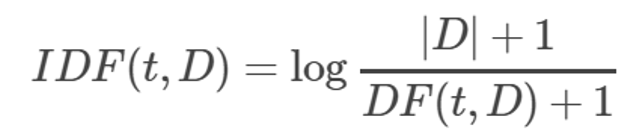

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(corpus)

In [39]:
print(text_tf[1,:])

  (0, 55)	0.2367607418602903
  (0, 34)	0.2367607418602903
  (0, 37)	0.2367607418602903
  (0, 20)	0.18006264680017628
  (0, 4)	0.2367607418602903
  (0, 49)	0.2367607418602903
  (0, 62)	0.2367607418602903
  (0, 19)	0.18006264680017628
  (0, 41)	0.2367607418602903
  (0, 26)	0.2367607418602903
  (0, 9)	0.2367607418602903
  (0, 63)	0.18006264680017628
  (0, 17)	0.2367607418602903
  (0, 1)	0.2367607418602903
  (0, 60)	0.18006264680017628
  (0, 8)	0.18006264680017628
  (0, 42)	0.27966941631381453
  (0, 24)	0.18006264680017628
  (0, 3)	0.27966941631381453
  (0, 68)	0.18006264680017628


In [38]:
print(text_tf[1,:].toarray())

[[0.         0.23676074 0.         0.27966942 0.23676074 0.
  0.         0.         0.18006265 0.23676074 0.         0.
  0.         0.         0.         0.         0.         0.23676074
  0.         0.18006265 0.18006265 0.         0.         0.
  0.18006265 0.         0.23676074 0.         0.         0.
  0.         0.         0.         0.         0.23676074 0.
  0.         0.23676074 0.         0.         0.         0.23676074
  0.27966942 0.         0.         0.         0.         0.
  0.         0.23676074 0.         0.         0.         0.
  0.         0.23676074 0.         0.         0.         0.
  0.18006265 0.         0.23676074 0.18006265 0.         0.
  0.         0.         0.18006265 0.         0.        ]]
